# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Постановка задачи

В моем распоряжении данные абонентов мобильной связи «Мегалайн».  
Многие клиенты пользуются архивными тарифами. Поэтому стоит задача построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В имещемся файле данные клиентов, которые уже перешли на эти тарифы.  
Задача построить модель для задачи классификации, которая выберет подходящий тариф. 
Необходимо постройть модель с максимально большим значением accuracy.   

Целевая доля правильных ответов должна быть более 0.75.

## Откроем и изучим данные

In [46]:
# импортирую необходимые библиотеки
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/datasets/users_behavior.csv')

Выведем на экран первые 5 строк датасета, чтобы убедиться, что файл считался

In [48]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Посмотрим размер файла

In [49]:
df.shape

(3214, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [51]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Значения в столбце **calls** и **messages** типа **float**.  
Переведем в целые числа

In [52]:
df.calls = df.calls.astype('int')
df.messages = df.messages.astype('int')

Построим график и посмотрим разбос и выбросы

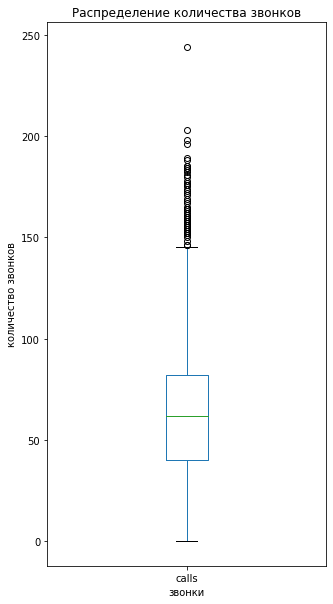

In [53]:
plt.figure(figsize=(5,10))
df.calls.plot(kind='box')
plt.xlabel('звонки')
plt.ylabel('количество звонков')
plt.title('Распределение количества звонков')
plt.show()

In [54]:
df[df.calls >140]['calls'].count()

75

По столбцу **calls** видим, что:  
- среднее значение 63 звонка в месяц; 
- медианное значение 62 звонка;  
- 3/4 всех значений лежит в предела 82 звонков;
- минимальное количество - 0 звонков;
- максимальное - 244 звонка
- 75 абонентов совершают более 140 звонков в месяц = "выбросы"

Посмотрим на столбец **minutes**

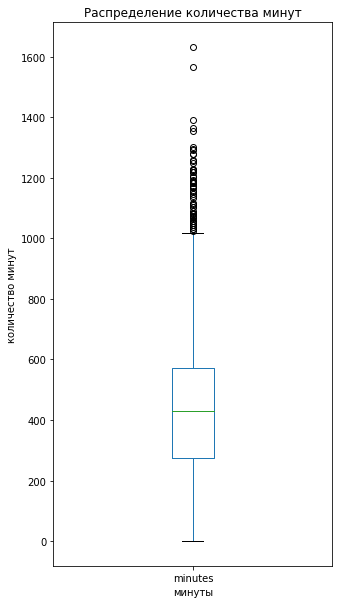

In [55]:
plt.figure(figsize=(5,10))
df.minutes.plot(kind='box')
plt.xlabel('минуты')
plt.ylabel('количество минут')
plt.title('Распределение количества минут')
plt.show()

In [56]:
df[df.minutes >1000]['minutes'].count()

66

По столбцу **minutes** видим, что:  
- среднее значение 438.2 минут  в месяц; 
- медианное значение 430 минут;  
- 3/4 всех значений лежит в предела 571 минуты;
- минимальное количество - 0 минут;
- максимальное - 1632 минут
- 66 абонентов разговаривают более 1000 минут в месяц = "выбросы"

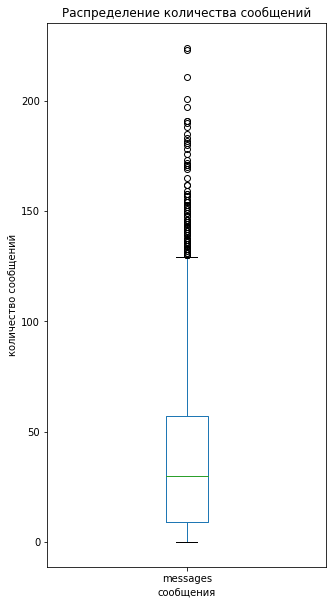

In [57]:
plt.figure(figsize=(5,10))
df.messages.plot(kind='box')
plt.xlabel('сообщения')
plt.ylabel('количество сообщений')
plt.title('Распределение количества сообщений')
plt.show()

In [58]:
df[df.messages >130]['messages'].count()

87

По столбцу **messages** видим, что:  
- среднее значение 38.2 сообщений в месяц; 
- медианное значение 30 сообщений;  
- 3/4 всех значений лежит в предела 57 сообщений;
- минимальное количество - 0 сообщений;
- максимальное - 224 сообщений;
- 87 абонентов отправляют более 130 сообщений в месяц = "выбросы".

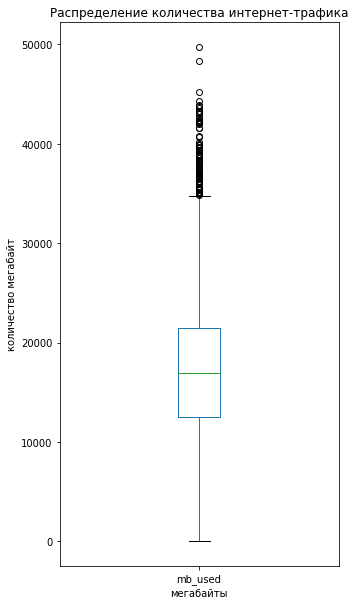

In [59]:
plt.figure(figsize=(5,10))
df.mb_used.plot(kind='box')
plt.xlabel('мегабайты')
plt.ylabel('количество мегабайт')
plt.title('Распределение количества интернет-трафика')
plt.show()

In [60]:
df[df.mb_used >35000]['mb_used'].count()

75

По столбцу **mb_used** видим, что:  
- среднее значение 17 207 mb в месяц; 
- медианное значение 16 943 mb;  
- 3/4 всех значений лежит в предела 21 424 mb;
- минимальное - 0 mb;
- максимальное - 49 745 mb
- 75 абонентов используют более 35 000 mb в месяц = "выбросы"

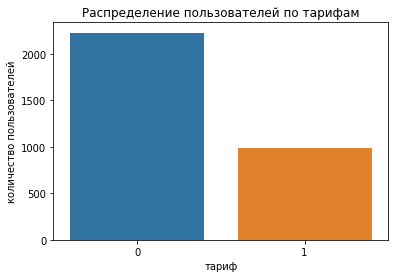

In [61]:
(
sns.barplot(
    data = df.pivot_table(index='is_ultra', values='calls', aggfunc='count')
    .reset_index(),
    x='is_ultra',
    y='calls')
)
plt.xlabel('тариф')
plt.ylabel('количество пользователей')
plt.title('Распределение пользователей по тарифам')
plt.show()

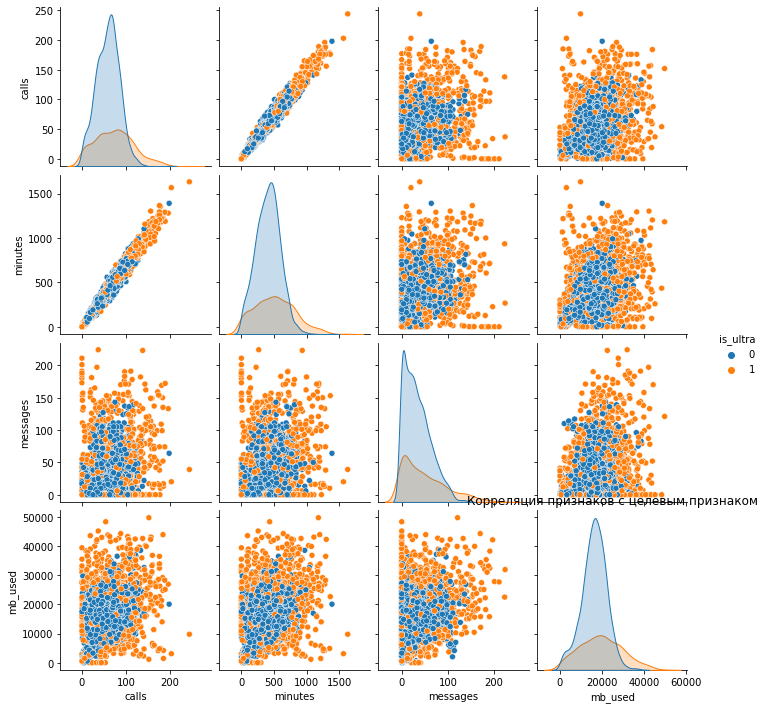

In [62]:
sns.pairplot(data = df, hue='is_ultra')
plt.title('Корреляция признаков с целевым признаком')
plt.show()

На графике видна корреляция между звонками и минутами

## Разбьем данные на выборки

Выделим целевой принак и признаки для предсказаний

**is_ultra** будет целевым признаком, который будем прогнозировать. Признак категориальный, значит будем решать задачу **классификации.**

In [63]:
features = df.drop('is_ultra', axis=1)
target = df.is_ultra
columns = features.columns.tolist()

Разделим исходный датасет на 3 части: тренировочную, валидационную и тестовую выборки в пропорциях 60:20:20.  

Первоначально разделим датасет на 2 части: Тренировочную и "временную" в пропорциях 60% и 40%.  
Далее "временную" поделю пополам, чтобы получить 20% в валидационную и 20% в тестовую выборку от изначального датасета.  
Будем использовать параметр **stratify** по целевому признаку чтобы получить примерно одинаковое отношение целевого признака в общему количеству данных в выборке.

In [64]:
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [65]:
features_train.shape # 60% от изначального датафрейма

(1928, 4)

оставшиеся 40% датайфрейма, которая сохранена в **features_temp** разделим пополам и получим 20% валидационной выборки и 20% тестовой от изначального размера датафрейма

In [66]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345, stratify=target_temp)

In [67]:
features_valid.shape

(643, 4)

In [68]:
features_test.shape

(643, 4)

Таким образом в результате разбиения получил 3 выборки:  
**features_train** - 1928 записей (60% исходного датасета);  
**features_valid** - 643 записей (20% исходного датасета);  
**features_test** - 643 записей (20% исходного датасета);  

## Исследуем модели

### Посмотрим модель дерева

переберем циклом длину дерева от 1 до 11

In [69]:
for depth in range(1,12):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    answer = model.predict(features_valid)
    print(f'max_depth = {depth} : {accuracy_score(target_valid,answer)}')

max_depth = 1 : 0.7402799377916018
max_depth = 2 : 0.7729393468118196
max_depth = 3 : 0.7776049766718507
max_depth = 4 : 0.7542768273716952
max_depth = 5 : 0.7853810264385692
max_depth = 6 : 0.7744945567651633
max_depth = 7 : 0.7869362363919129
max_depth = 8 : 0.80248833592535
max_depth = 9 : 0.7822706065318819
max_depth = 10 : 0.7729393468118196
max_depth = 11 : 0.7620528771384136


Получили, что наилучшее значение параметра **accuracy** = 0.8024 достигается при длине дерева равному **8**.  

Из результатов видно, что при длине дерева 9 и более значение **accuracy** начинает снижаться

### Посмотрим модель случайного леса

In [70]:
best_model = None
best_result = 0
best_est = 0

for est in range(1,200,10):
    model = RandomForestClassifier(random_state=12345, n_estimators = est, min_samples_split=5, min_samples_leaf=4)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_result = result
        best_model = model
        best_est = est

In [71]:
best_result

0.8195956454121306

In [72]:
best_model

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=131, random_state=12345)

получили, что accuracy модели случайного леса дает значение **accuracy** равным 0,8195 с количеством деревьев 131

### Посмотрим на результаты работы Линейной регрессии

Проверю есть ли сильная корреляция между признаками и целевым признаком

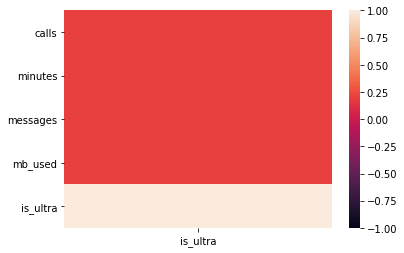

In [73]:
sns.heatmap(df.corr()[['is_ultra']], vmax=1, vmin=-1);

#### Используем линейную модель без использования масштабирования

In [74]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 

In [75]:
model.fit(features_train, target_train) 
model.predict(features_valid) 
model.score(features_valid, target_valid) 

0.7387247278382582

In [76]:
model.coef_[0]

array([ 1.31332014e-02, -5.03316121e-04,  1.07303581e-02,  4.00856937e-05])

Выведем полученные коэффициенты модели логистической регрессии

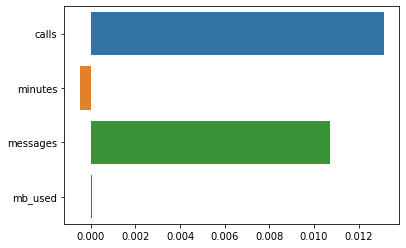

In [77]:
sns.barplot(y=columns, x=(model.coef_[0]))
plt.show()

В результате видим, что в линейной модели целевой критерий наиболее зависит от количества звонков и сообщений

#### Используем линейную модель с использования масштабирования

Обучим StandardScaler на обучающей выборке, валидационную и тестовую трансформируем. Таким образом избежим утечки данных

In [78]:
scarler = StandardScaler()
scarler = scarler.fit(features_train)
features_train_scaled = scarler.transform(features_train)
features_valid_scaled = scarler.transform(features_valid)

In [79]:
model.fit(features_train_scaled, target_train)
preds = model.predict(features_valid_scaled)
model.score(features_valid_scaled, target_valid)

0.7387247278382582

In [80]:
model.coef_

array([[ 0.3988917 , -0.08279427,  0.39095613,  0.30094091]])

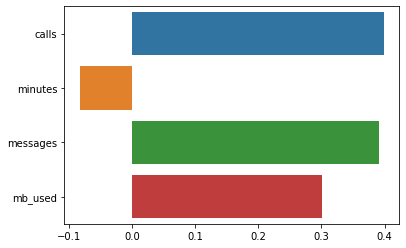

In [81]:
sns.barplot(y=columns, x=(model.coef_[0]))
plt.show()

по масштарованным данным получили практическую одинаковую зависимость целевого признака от количество звонков и сообщений и чуть ниже от использованного интернет-трафика.  
Хотя без использования масштабирования трафик "не имел" вес.  
Минуты и в первом и в этом случае "не имеют" сильный вес

## Проверим модель на тестовой выборке

Проверим модель на тестовой выборке. 
Используем модель случайного леса. В качестве гиперпараметров установим:
- количество деревьев = 131, 
- минимальное количество выборок, которое внутренний узел должен содержать для разделения на следующие узлы = 5,
- минимальное количество выборок, которое узел должен удерживать после разделения = 4

Предварительно объединим тренировочную и валидационную выборку, чтобы обучить модель на объединенных данных.

In [82]:
features_train_valid = pd.concat([features_train,features_valid], axis=0)

In [83]:
target_train_valid = pd.concat([target_train,target_valid], axis=0)

In [84]:
model = RandomForestClassifier(random_state=12345, n_estimators = 131, min_samples_split=5, min_samples_leaf=4)
model.fit(features_train_valid, target_train_valid)
result = model.score(features_test, target_test)
result

0.8351477449455676

Поручили показать **accuracy** равный 0,8351

## Проверим модели на адекватность

Предположим, что в случайной выборке вероятность предсказать необходимость выбрать тариф «Ультра» - 1 и тариф "Смарт" = 0.  
accuracy = 0,5 * (*доля угаданных тарифов "Ультра"*) + 0,5 * (*Долю угаданных тарифов "Смарт"*).  
В случае, когда доля тарифов **Смарт** и **Ультра** равна, а вероятность угадать 1 или 0 равна 50%, т.к. ответы модели не связаны с правильными ответами, получаем:  
accuracy = 0,5 * 0,5 + 0,5 * 0,5 = 0,25 + 0,25 = 0,5

Полученный нами ранее **accuracy = 0,8351** больше **0,5**, поэтому можно сказать, что модель адекватная

<div class="alert alert-block alert-info">

<b>Совет:</b> Можно просто всегда предсказывать наибольший класс и порог адекватности, станет строже. Для данной задачи удобен инструмент DummyClassifier</div>

## ВЫВОД

В нашем распоряжении были данные абонентов мобильной связи **«Мегалайн».**    
Многие клиенты пользуются архивными тарифами. Поэтому стояла задача построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: **«Смарт» или «Ультра».**  

В результате выполнения проекта первоначально загрузили данные, убедились в том, что данные корректно загрузились, посмотрели размерность, типы данных в датасете и вывели основные статистические параметры датасета.  
После перевели значения в столбцах **calls** и **messages** в целый  тип.

Далее было необходимо разделить выборку на 3 части: 
- тренировочную – на которой мы обучали модель, 
- валидационную – для проверки модели,
- тестовую для итоговой оценки работы модели.  

Таким образом я отделил 60% датасета в тренировочную выборку, 20% в валидационную и 20% в тестовую.
После разделения датасета на выборки я последовательно проверил работу трех типов моделей на тренировочной и валидацонной выборках:  

**Результаты работы моделей**  

**1)	Модель дерева:**  
В результате исследования получили показатель **accuracy** равным 0,8024 при длине дерева равным 8.


**2)	Модель случайного леса:**  

В результате исследования получили показатель **accuracy** равным 0,8195 при следующих гиперпараметрах: **min_samples_leaf=4, min_samples_split=5, n_estimators=131**


**3)	Модель линейной регрессии:**  
Предварительно проверили есть ли прямая сильная корреляция между параметрами, чтобы заранее исключить явный коррелирующий признак с целевым признаком. Таких признаков не оказалось.

**3.1) Без масштабирования:**  
Использовали признаки в тех единицах измерения, в которых они были представлены.  
В результате исследования получили показатель **accuracy** равным 0,73. При этом признаками с наибольшим весом коэффициентов получились звонки и сообщения

**3.2) С масштабированием:**  
Сначала привели все признаки к «единой» размерности, чтобы модель могла их использовать без учета единиц измерения.
В результате исследования получили показатель **accuracy** равным 0,73. При этом признаками с наибольшим весом коэффициентов получились: звонки, сообщения и интернет-трафик

**Проверка работы модели на тестовой выборке** 

В итоге решили прогнозировать тариф для перехода на основании модели случайного леса, т.к. она показала наибольший результат на валидационной выборке.
Предварительно объединили тренировочную и валидационную выборку, чтобы обучить модель на объединенных данных.
Таким образом в результате прогона модели на тестовой выборке получили показатель **accuracy** равным 0,8351.  
Без объединения тренировочной и валидационной выборки результат работы модели получался 0,8211, что на 0,0130 хуже.

<b> Целевую задачу проекта выполнили успешно, а именно получили **accuracy** более 0,75%. 
Таким образом используя модель случайного леса можно предсказать верный тариф для перехода в 83,51% случаях</b>

Дополнительно проверили модель на адекватность, сравнив ее со случайно выборкой. Получил, что моя модель «адекватная»
